In [5]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from umap import UMAP
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
original = np.load('../data/original.npy')
generated = np.load('../data/generated.npy')

In [4]:
original.shape

(10000, 500)

(array([1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([0.3497975 , 0.36947781, 0.38915813, 0.40883844, 0.42851875,
        0.44819907, 0.46787938, 0.48755969, 0.50724   , 0.52692032,
        0.54660063, 0.56628094, 0.58596125, 0.60564157, 0.62532188,
        0.64500219, 0.66468251, 0.68436282, 0.70404313, 0.72372344,
        0.74340376, 0.76308407, 0.78276438, 0.80244469, 0.82212501,
        0.84180532, 0.86148563, 0.88116595, 0.90084626, 0.92052657,
        0.94020688, 0.9598872 , 0.97956751, 0.99924782, 1.01892813,
        1.03860845, 1.05828876, 1.07796907, 1.09764939, 1.1173297 ,
      

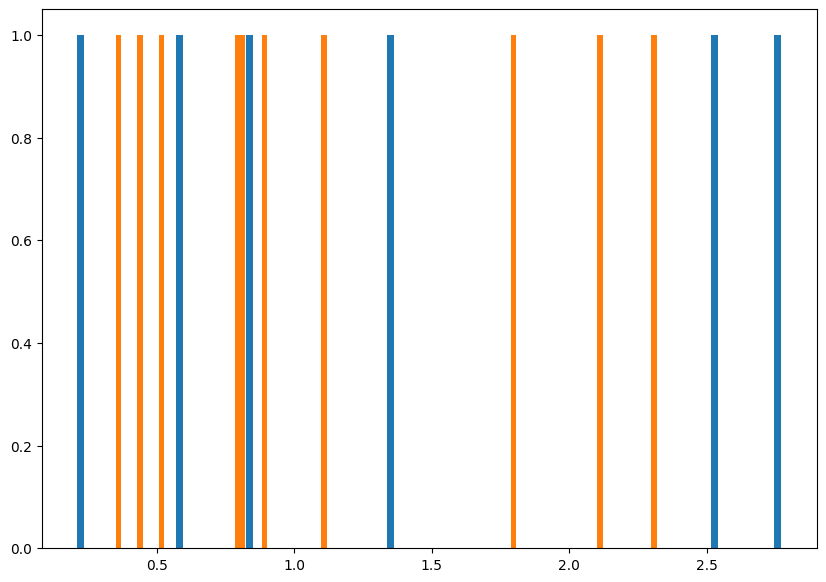

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,7), sharex=False, sharey=False)
gen_original = original[:,0]
gen_genrated = generated[:,0]
ax.hist(gen_original[gen_original > 0], bins=100)
ax.hist(gen_genrated[gen_genrated > 0], bins=100)

In [28]:
list(Counter(generated[:,0]))

[0.0,
 0.5144387483596802,
 0.7924330234527588,
 1.7981221675872803,
 2.3178287744522095,
 2.1184654235839844,
 0.8094543516635895,
 0.8851786553859711,
 0.3497975021600723,
 1.1169207096099854,
 0.4291842579841614]

In [31]:
Counter(generated[:,2])

Counter({0.0: 9997,
         0.6405546367168427: 1,
         0.6839991509914398: 1,
         0.3497975021600723: 1})

In [18]:
cov = np.cov(original.T)

In [26]:
cov[2]

array([-2.31225451e-07,  0.00000000e+00,  5.35524750e-04,  0.00000000e+00,
       -2.52394616e-08,  0.00000000e+00,  0.00000000e+00, -1.77156695e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.67278989e-09, -1.40125144e-07,  0.00000000e+00, -2.44478876e-07,
        0.00000000e+00,  0.00000000e+00, -1.63145191e-07,  0.00000000e+00,
        0.00000000e+00, -1.81270912e-05,  0.00000000e+00, -6.41375413e-07,
       -8.29394386e-08, -1.23776530e-07,  0.00000000e+00, -2.13014115e-07,
       -1.32666555e-07,  2.76118794e-05,  0.00000000e+00,  0.00000000e+00,
       -2.13527068e-07, -6.69570748e-08, -3.39135846e-08,  0.00000000e+00,
       -4.22369247e-08, -2.77108224e-08, -1.33639495e-09,  3.57672049e-06,
       -2.97766359e-07, -2.96194168e-07, -2.77557643e-07, -7.60596995e-07,
        0.00000000e+00, -9.08920929e-09, -2.05163752e-07,  0.00000000e+00,
       -1.86927581e-08, -3.08069798e-08,  0.00000000e+00, -4.82919135e-07,
       -2.11980444e-08,  

In [15]:
cov

array([[ 1.00000000e+00,             nan, -2.42361489e-04, ...,
        -3.49291591e-04,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [-2.42361489e-04,             nan,  1.00000000e+00, ...,
        -2.09830442e-04,             nan,             nan],
       ...,
       [-3.49291591e-04,             nan, -2.09830442e-04, ...,
         1.00000000e+00,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan],
       [            nan,             nan,             nan, ...,
                    nan,             nan,             nan]])

<Axes: >

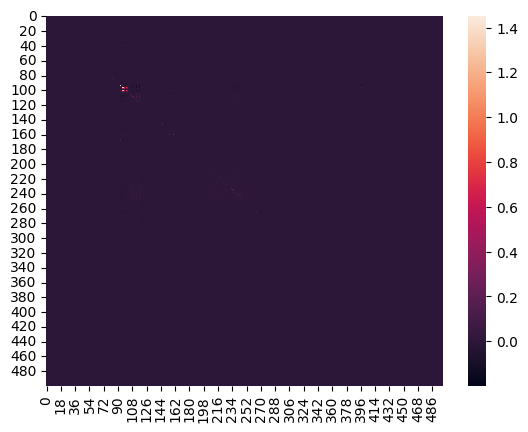

In [27]:
sns.heatmap(cov, fmt='g')

<Axes: >

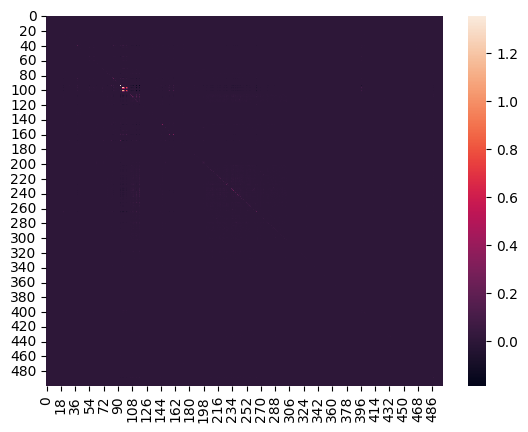

In [28]:
cov = np.cov(generated.T)
sns.heatmap(cov, fmt='g')

# Unmasked data

In [2]:
original = np.load('../data/original_unmasked.npy')
generated = np.load('../data/generated_unmasked.npy')

In [3]:
original.shape

(10000, 500)

In [4]:
def plot_dataset(p, dataset, n_components=50):
    # translate bin into expression data
    print(dataset.data)
    print(dataset.data.shape)
    data = get_exp_profiles(p, dataset)
    data = np.round(data, decimals=5)
    # perform pca
    print(data)
    print(data.shape)
    pca = PCA(n_components=n_components)
    data_pca = pca.fit_transform(data)
    data_pca = np.round(data_pca, decimals=5)
    # UMAP
    umap_2d_pca = UMAP(n_components=2, init='random', random_state=0)
    proj_2d_pca = umap_2d_pca.fit_transform(data_pca)
    # umap_2d = UMAP(n_components=2, init='random', random_state=0)
    # proj_2d = umap_2d.fit_transform(data)

    fig = plt.figure(figsize=(10, 7))
    plt.scatter(proj_2d_pca[:,0], proj_2d_pca[:,1], alpha=.3, label='data')
    plt.title('UMAP of spleen dataset (with PCA)')

    plt.savefig('/home/claassen/cxb257/scTransformer/fig/spleen_processed_pca.png')

In [24]:
def plot_UMAP(generted_expression_profiles, src_expression_profiles):
    umap_2d = UMAP(n_components=2, init='random', random_state=0)
    src_expression_profiles = np.round(src_expression_profiles, decimals=5)
    proj_2d = umap_2d.fit_transform(np.vstack([src_expression_profiles, generted_expression_profiles]))
    n_src = src_expression_profiles.shape[0]
    print(f'n_src: {n_src}')
    fig, ax = plt.subplots(2, 1, figsize=(10, 7), sharex=True, sharey=True)
    # sample vs generated
    ax[0].scatter(proj_2d[:n_src, 0], proj_2d[:n_src, 1], c='blue', alpha=.5, label='data', s=10)
    ax[0].scatter(proj_2d[n_src:, 0], proj_2d[n_src:, 1], c='yellow', alpha=.5, label='generated', s=10)
    ax[0].legend()
    fig.suptitle(f'umap of binned expression profiles')
    fig.supxlabel('umap 1')
    fig.supylabel('umap 2')
    ax[1].scatter(proj_2d[:n_src, 0], proj_2d[:n_src, 1], alpha=.5, s=10)

    plt.show()

n_src: 10000


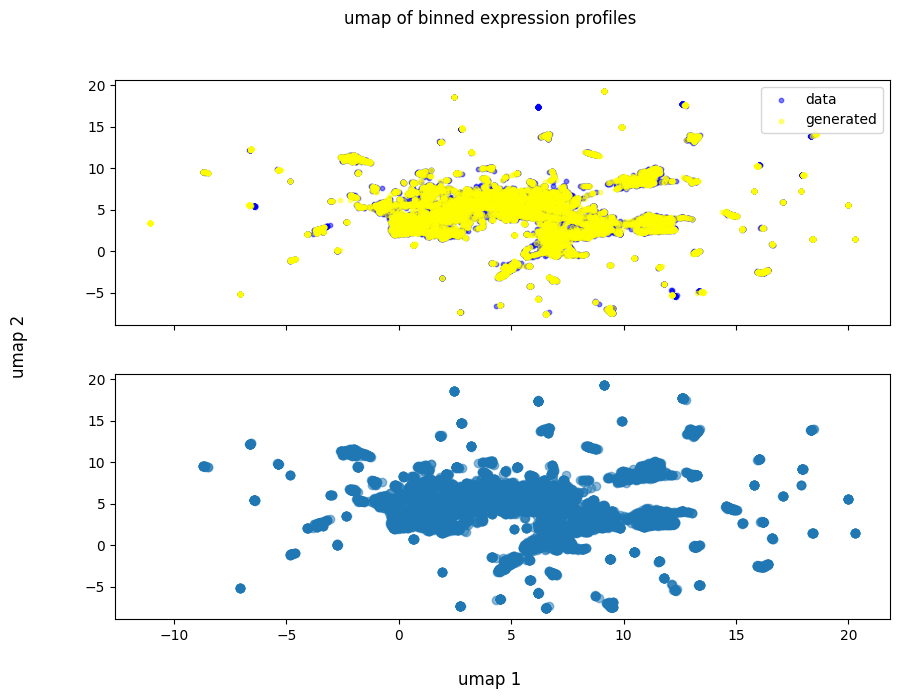

In [12]:
plot_UMAP(original, generated)

In [22]:
path='../data/spleen_generated_samples_mean_profile.npy'
spleen = np.load(path)

n_src: 10000


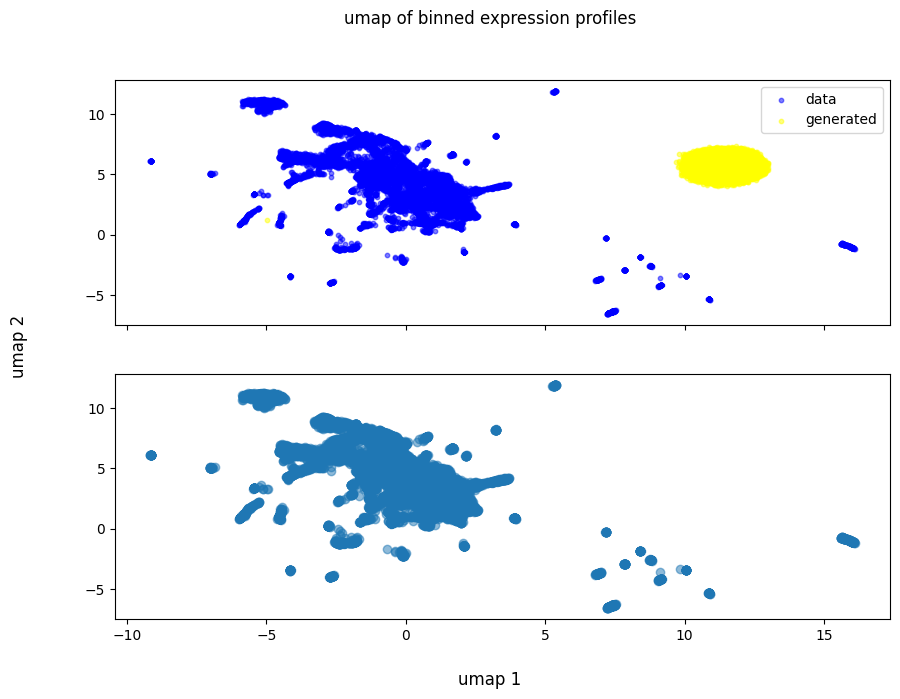

In [23]:
plot_UMAP(spleen, original)

In [21]:
np.mean(generated, axis=0)

array([1.11318236e-03, 0.00000000e+00, 1.67435130e-04, 0.00000000e+00,
       7.28039533e-05, 0.00000000e+00, 0.00000000e+00, 5.89632719e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.90735875e-04, 0.00000000e+00, 4.45691741e-04,
       0.00000000e+00, 4.77041905e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 6.38780675e-02, 0.00000000e+00, 2.45922696e-03,
       8.07232947e-04, 1.94306773e-04, 0.00000000e+00, 8.96327127e-04,
       1.07022927e-03, 6.02184460e-03, 7.59123296e-05, 4.86807942e-05,
       3.02685673e-04, 0.00000000e+00, 2.04983185e-04, 0.00000000e+00,
       3.71116038e-05, 1.82990408e-04, 7.18589131e-04, 8.87642578e-02,
       9.33157603e-04, 7.61999957e-04, 3.39906464e-03, 2.89675752e-03,
       6.83999151e-05, 9.57152948e-06, 7.09331540e-04, 0.00000000e+00,
       2.77636066e-05, 3.31803276e-04, 0.00000000e+00, 7.43168916e-04,
       6.69406474e-05, 0.00000000e+00, 8.45429327e-03, 4.35079650e-04,
      